# More IdentityMultiple methods

- https://github.com/JuliaReach/MathematicalSystems.jl/issues/171
- https://github.com/JuliaReach/MathematicalSystems.jl/pull/170

In [ ]:
using ControlSystems
using MathematicalSystems
using LinearAlgebra

A = rand(3,3)
B = rand(3,2)
Q = I(3)
R = I(2)
dlqr(A, B, Q, R)

In [ ]:
LinearAlgebra.eigvals(x::IdentityMultiple) = x.M.λ

In [ ]:
eigvals(hcat(2.0))

In [ ]:
x = I(2)

In [ ]:
x.M.λ

In [ ]:
value(x)

# Support function for hyperrectangular sets

In [ ]:
using Revise, LazySets, IntervalArithmetic, BenchmarkTools, Test, StaticArrays

In [ ]:
using LazySets: sign_cadlag

# HYPERRECTANGLE

@inline function LazySets.center(H, i)
    return H.center[i]
end

function σ0(d::AbstractVector{N}, H::AbstractHyperrectangle{N}) where {N<:Real}
    n = length(d)
    @assert n == dim(H) "a $(length(d))-dimensional vector is " *
                                "incompatible with a $(dim(H))-dimensional set"
    if n == 2
        res = similar(d)
        res[1] = center(H, 1) + sign_cadlag(d[1]) * radius_hyperrectangle(H, 1)
        res[2] = center(H, 2) + sign_cadlag(d[2]) * radius_hyperrectangle(H, 2)
        return res
    else
        return center(H) .+ sign_cadlag.(d) .* radius_hyperrectangle(H)
    end
end


# INTERVAL BOX

LazySets.dim(B::IntervalBox{D, N}) where {D, N} = D

function σ1(d::AbstractVector{N}, B::IntervalBox{D, N}) where {D, N<:Real}
    n = length(d)
    @assert length(d) == dim(B) "a $(length(d))-dimensional vector is " *
                                 "incompatible with a $(dim(H))-dimensional set"
    res = Vector{N}(undef, n)
    @inbounds for (i, di) in enumerate(d)
        res[i] = ifelse(di < zero(N), inf(B.v[i]), sup(B.v[i]))
    end
    return res
end

function σ2(d::AbstractVector{N}, B::IntervalBox{D, N}) where {D, N<:Real}
    n = length(d)
    @assert n == dim(B) "a $(length(d))-dimensional vector is " *
                         "incompatible with a $(dim(H))-dimensional set"
    res = Vector{N}(undef, n)
    @inbounds for (i, di) in enumerate(d)
        if di < zero(N)
            res[i] = inf(B.v[i])
        else
            res[i] = sup(B.v[i])
        end
    end
    return res
end

function σ3(d::AbstractVector{N}, B::IntervalBox{D, N}) where {D, N<:Real}
    n = length(d)
    @assert n == dim(B) "a $(length(d))-dimensional vector is " *
                         "incompatible with a $(dim(H))-dimensional set"
    res = Vector{N}(undef, n)
    @inbounds for (i, di) in enumerate(d)
        res[i] = di < zero(N) ? inf(B.v[i]) : sup(B.v[i])
    end
    return res
end

function σ4(d::AbstractVector{N}, B::IntervalBox{2, N}) where {D, N<:Real}
    n = length(d)
    @assert n == 2 "a $(length(d))-dimensional vector is " *
                         "incompatible with a $(dim(H))-dimensional set"
    x = ifelse(d[1] < zero(N), inf(B.v[1]), sup(B.v[1]))
    y = ifelse(d[2] < zero(N), inf(B.v[2]), sup(B.v[2]))
    return SVector(x, y)
end

function σ5(d::AbstractVector{N}, B::IntervalBox{2, N}) where {D, N<:Real}
    n = length(d)
    @assert n == 2 "a $(length(d))-dimensional vector is " *
                         "incompatible with a $(dim(H))-dimensional set"
    res = similar(d)
    res[1] = d[1] < zero(N) ? inf(B.v[1]) : sup(B.v[1])
    res[2] = d[2] < zero(N) ? inf(B.v[2]) : sup(B.v[2])
    return res
end

In [ ]:
n = 2

X = rand(Hyperrectangle, dim=n);
Xs = Hyperrectangle(SVector{2, Float64}(X.center), SVector{2, Float64}(X.radius))

dir = rand(n);
dirs = SVector{2, Float64}(dir)

In [ ]:
@btime σ($dir, $X);
@btime σ($dirs, $X);
@btime σ($dirs, $Xs);

In [ ]:
@btime σ0($dir, $X);
@btime σ0($dirs, $X);
@btime σ0($dirs, $Xs);

In [ ]:
@btime σ0_2($dir, $X);

In [ ]:
@btime σ0_2($dirs, $X);

In [ ]:
@btime σ0_2($dirs, $Xs);

In [ ]:
B = convert(IntervalBox, X);

In [ ]:
@btime σ1($dir, $B);

In [ ]:
@btime σ2($dir, $B);

In [ ]:
@btime σ3($dir, $B);

In [ ]:
(40 - 28)/40.

In [ ]:
@btime σ4($dirs, $B)

In [ ]:
@btime σ5($dirs, $B)

In [ ]:
dir

In [ ]:
@btime σ4($dirs, $B)

Conclusion: for 2d, use `Hyperectangle` with static vectors.

# Conversions and from GeometyTypes

In [1]:
using Revise, LazySets, GeometryTypes

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/LazySets/NjrGc.ji for LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1240


In [2]:
h = HyperRectangle(Vec(0.0, 0.0), Vec(1.0, 2.0))

HyperRectangle{2,Float64}([0.0, 0.0], [1.0, 2.0])

In [3]:
z = convert(Hyperrectangle, h)

Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([0.5, 1.0], [0.5, 1.0])

In [4]:
convert(HyperRectangle, z)

HyperRectangle{2,Float64}([0.0, 0.0], [1.0, 2.0])

In [5]:
b = HyperCube(Vec(0.0, 0.0), 2.0)

HyperCube{2,Float64}([0.0, 0.0], 2.0)

In [6]:
convert(Hyperrectangle, b)

Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([1.0, 1.0], [1.0, 1.0])

In [7]:
bi = convert(BallInf, b)

BallInf{Float64}([1.0, 1.0], 1.0)

In [8]:
convert(HyperCube, bi)

HyperCube{2,Float64}([0.0, 0.0], 2.0)

In [9]:
s = HyperSphere(Point(1.0, 2.0, 3.0), 0.5)

HyperSphere{3,Float64}([1.0, 2.0, 3.0], 0.5)

In [10]:
b2 = convert(Ball2, s)

Ball2{Float64}([1.0, 2.0, 3.0], 0.5)

In [11]:
convert(HyperSphere, b2)

HyperSphere{3,Float64}([1.0, 2.0, 3.0], 0.5)

In [12]:
b = rand(Ball2)

Ball2{Float64}([0.28005938686235204, -0.1359215662654988], 0.3750045828130412)

In [13]:
LazySets.radius(b)

0.3750045828130412

In [14]:
function convert2(::Type{Ball2}, X::HyperSphere{D, N}) where {D, N}
    o = origin(X)
    r = GeometryTypes.radius(X)
    return Ball2(Vector(o), r) # TODO: add AbstractVector parameter for Ball2's center
end

convert2 (generic function with 1 method)

In [15]:
convert2(Ball2, s)

Ball2{Float64}([1.0, 2.0, 3.0], 0.5)

In [16]:
Point(1.0, 2.0, 4.0)

3-element Point{3,Float64} with indices SOneTo(3):
 1.0
 2.0
 4.0

## Convex hulls

In [1]:
using LazySets, Plots

In [11]:
X = [rand(HPolygon) for _ in 1:4];

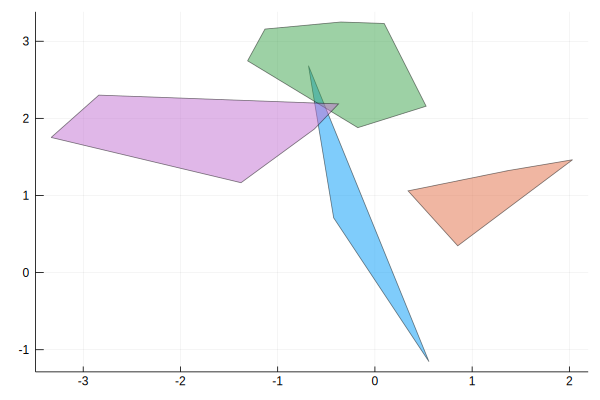

In [12]:
plot(X)

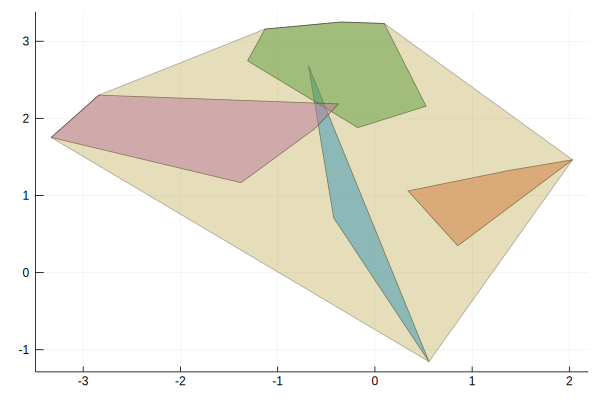

In [13]:
plot!(ConvexHullArray(X), alpha=.3)

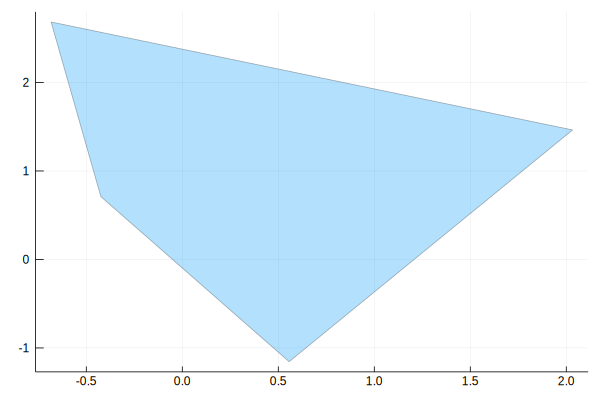

In [15]:
plot(CH(X[1], X[2]), alpha=.3)

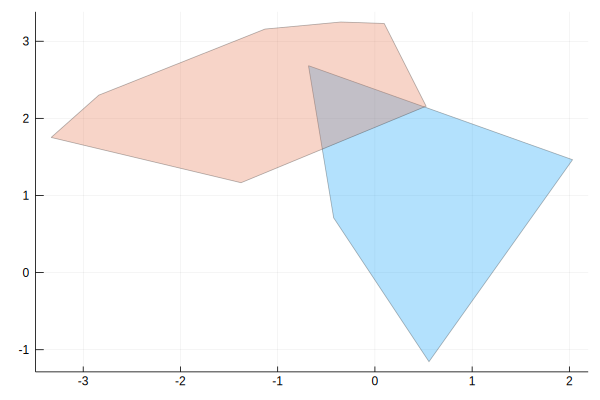

In [16]:
plot!(CH(X[3], X[4]), alpha=.3)

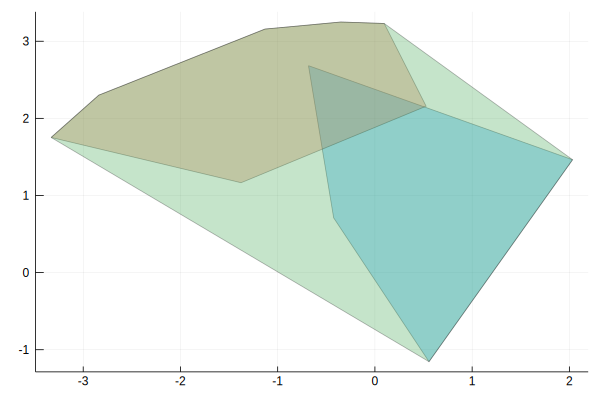

In [17]:
plot!(ConvexHullArray(X), alpha=.3)

## Block arrays

In [3]:
using RecursiveArrayTools

In [4]:
using LazySets

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/LazySets/NjrGc.ji for LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1240


In [25]:
Z1 = [rand(Zonotope) for _ in 1:3]
Z2 = [rand(Zonotope) for _ in 1:5]
Z3 = [rand(Zonotope) for _ in 1:2]
Z4 = [rand(Zonotope) for _ in 1:20];

In [31]:
a = VectorOfArray([Z1, Z2, Z3, Z4]);

In [32]:
typeof(a)

VectorOfArray{Zonotope{Float64},2,Array{Array{Zonotope{Float64},1},1}}

In [33]:
a[1, 2]

Zonotope{Float64}([0.41031035463823, 1.0139792213928578], [0.38291323288788276 0.7493808681674676; -0.14706782288956438 -1.0875258079227086])

In [34]:
size(a)

(3, 4)

In [35]:
length(a)

4

In [36]:
a[1]

3-element Array{Zonotope{Float64},1}:
 Zonotope{Float64}([0.9192185267969707, -0.19206234183992194], [1.3246665998371567 0.9862550844614043; -0.7379380114437374 -1.272648372519858])                                       
 Zonotope{Float64}([0.549564634260634, 0.1512781901823341], [-1.7207100707693794 -0.14953340279001623; 0.8341008185542287 -1.1275586283780528])                                       
 Zonotope{Float64}([-0.04687514633916015, 1.1639046462563218], [0.5066655015657942 0.7770299885993475 2.232696246498871; 0.44092475265033754 -0.9729318742399405 -0.2651645286930498])

In [37]:
a[2, 1]

Zonotope{Float64}([0.549564634260634, 0.1512781901823341], [-1.7207100707693794 -0.14953340279001623; 0.8341008185542287 -1.1275586283780528])

### Notes

`A[i]` returns the i-th flowpipe. `A[j, i]` returns the j-th reach-set of the i-th flowpipe.

The length of the `VectorOfArray` corresponds to the number of flowpipes.

In [40]:
typeof(a)

VectorOfArray{Zonotope{Float64},2,Array{Array{Zonotope{Float64},1},1}}

In [41]:
a

4-element Array{Array{Zonotope{Float64},1},1}:
 [Zonotope{Float64}([0.9192185267969707, -0.19206234183992194], [1.3246665998371567 0.9862550844614043; -0.7379380114437374 -1.272648372519858]), Zonotope{Float64}([0.549564634260634, 0.1512781901823341], [-1.7207100707693794 -0.14953340279001623; 0.8341008185542287 -1.1275586283780528]), Zonotope{Float64}([-0.04687514633916015, 1.1639046462563218], [0.5066655015657942 0.7770299885993475 2.232696246498871; 0.44092475265033754 -0.9729318742399405 -0.2651645286930498])]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [44]:
# iterate over reach-sets
for ai in a
    for z in ai
        println(z)
    end
end

Zonotope{Float64}([0.9192185267969707, -0.19206234183992194], [1.3246665998371567 0.9862550844614043; -0.7379380114437374 -1.272648372519858])
Zonotope{Float64}([0.549564634260634, 0.1512781901823341], [-1.7207100707693794 -0.14953340279001623; 0.8341008185542287 -1.1275586283780528])
Zonotope{Float64}([-0.04687514633916015, 1.1639046462563218], [0.5066655015657942 0.7770299885993475 2.232696246498871; 0.44092475265033754 -0.9729318742399405 -0.2651645286930498])
Zonotope{Float64}([0.41031035463823, 1.0139792213928578], [0.38291323288788276 0.7493808681674676; -0.14706782288956438 -1.0875258079227086])
Zonotope{Float64}([1.2422220792573697, 0.5368456632747086], [-0.6254165109120269 -1.349887539812315 0.5143284273880253; -0.45901620244963554 -0.3584938647035411 -0.08531829488421747])
Zonotope{Float64}([-0.02319411537579259, -1.5988866791913672], [-0.010354412761098499 -1.081643696390651 -2.0990777538170797; 0.42768681643541745 -0.1285062661245617 -0.05436056619249611])
Zonotope{Float64}

## POP solve API for purely cont systems

In [1]:
using Revise, MathematicalSystems, ReachabilityAnalysis
const R = ReachabilityAnalysis

using MathematicalSystems # mforets/ivp_macro
using MathematicalSystems: @ivp

p = @ivp(x' = -x, x(0) ∈ 0..1)

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ReachabilityAnalysis/fYI0z.ji for ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **

ERROR: LoadError: LoadError: syntax: invalid "::" syntax
Stacktrace:
 [1] top-level scope at /home/mforets/.julia/dev/ReachabilityAnalysis/src/discretization.jl:28
 [2] include at ./boot.jl:328 [inlined]
 [3] include_relative(::Module, ::String) at ./loading.jl:1094
 [4] include at ./Base.jl:31 [inlined]
 [5] include(::String) at /home/mforets/.julia/dev/ReachabilityAnalysis/src/ReachabilityAnalysis.jl:1
 [6] top-level scope at /home/mforets/.julia/dev/ReachabilityAnalysis/src/ReachabilityAnalysis.jl:21
 [7] include at ./boot.jl:328 [inlined]
 [8] include_relative(::Module, ::String) at ./loading.jl:1094
 [9] include(::Module, ::String) at ./Base.jl:31
 [10] top-level scope at none:2
 [11] eval at ./boot.jl:330 [inlined]
 [12] e

ErrorException: Failed to precompile ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f] to /home/mforets/.julia/compiled/v1.2/ReachabilityAnalysis/fYI0z.ji.

In [2]:
R._default_continuous_post(p)

UndefVarError: UndefVarError: R not defined

In [3]:
solve(p, T=1.0)

MethodError: MethodError: no method matching dim(::IntervalArithmetic.Interval{Float64})
Closest candidates are:
  dim(!Matched::HalfSpace) at /home/mforets/.julia/dev/LazySets/src/Sets/HalfSpace.jl:80
  dim(!Matched::AbstractCentrallySymmetric) at /home/mforets/.julia/dev/LazySets/src/Interfaces/AbstractCentrallySymmetric.jl:45
  dim(!Matched::Interval) at /home/mforets/.julia/dev/LazySets/src/Sets/Interval.jl:126
  ...

## Requires macro

In [285]:
# final version
macro requires(module_name)
    m = Meta.quot(Symbol(module_name))
    return esc(:(@assert isdefined(@__MODULE__, $m) "package `$($m)` is required " *
                                    "for this function; do `using $($m)` and try again"))
end

@requires (macro with 1 method)

In [286]:
@macroexpand @requires LazySets

:(if isdefined(Main, :LazySets)
      nothing
  else
      Base.throw(Base.AssertionError((Base.Main).Base.string("package `$(:LazySets)` is required " * "for this function; do `using $(:LazySets)` and try again")))
  end)

In [287]:
@requires LazySets

AssertionError: AssertionError: package `LazySets` is required for this function; do `using LazySets` and try again

In [288]:
using LazySets

In [289]:
@requires LazySets

In [236]:
macro f(expr)
    !isdefined(@__M)
    return Expr(:call, isdefined, @__MODULE__, Meta.quot(Symbol(expr)))
    #return Expr(:call, isdefined, @__MODULE__, esc(:($(expr))))
end

@f (macro with 1 method)

In [237]:
@macroexpand @f LazySets

:((isdefined)(Main, :LazySets))

In [238]:
@f LazySets

false

In [234]:
macro s_str(p)
    Meta.quot(Symbol(p))
end

@s_str (macro with 1 method)

In [235]:
@macroexpand @s_str caca

:(:caca)

In [230]:
@s_str x

:x

In [ ]:
@assert isdefined(@__MODULE__, :Expokit) "package `Expokit` required for " * "this function; do `using Expokit` and try again"

In [40]:
macro containervariable(container, element)
    assignment = :($(Symbol(container, element)) = $container[$element])
    return esc(assignment)
end

@containervariable (macro with 1 method)

In [41]:
Symbol(Meta.parse("a+1"), Meta.parse("b"))

Symbol("a + 1b")

In [42]:
typeof(Meta.parse("a+1"))

Expr

In [43]:
@macroexpand @containervariable letters 1

:(letters1 = letters[1])

In [51]:
@containervariable letters 1

"a"

In [49]:
letters = ["a", 2, 3]

3-element Array{Any,1}:
  "a"
 2   
 3   

In [52]:
letters1

"a"

In [11]:
letters1

1

## AD

- https://github.com/JuliaDiff/ForwardDiff.jl
- https://github.com/YingboMa/ForwardDiff2.jl

In [1]:
using ForwardDiff

In [2]:
f(x::Vector) = sum(sin, x) + prod(tan, x) * sum(sqrt, x);

In [3]:
x = rand(5)

5-element Array{Float64,1}:
 0.30468958660181844
 0.7056806072798452 
 0.9062998525326904 
 0.8262668599428025 
 0.4043011791849107 

In [4]:
g = x -> ForwardDiff.gradient(f, x); # g = ∇f

In [6]:
g(x)

5-element Array{Float64,1}:
 3.2563058094203505
 2.1070101680111932
 1.9725331979910354
 2.0045633281799287
 2.7522710577120773

In [7]:
ForwardDiff.hessian(f, x)

5×5 Array{Float64,2}:
 1.82703  4.99425  5.03422  4.92546  6.80254
 4.99425  1.79982  2.94133  2.87769  3.97429
 5.03422  2.94133  2.75924  2.90081  4.0063 
 4.92546  2.87769  2.90081  2.25291  3.91965
 6.80254  3.97429  4.0063   3.91965  1.60449

In [8]:
function f(x, p, t)
    1.01*x
end

f (generic function with 2 methods)

In [10]:
using ForwardDiff: gradient, hessian

In [26]:
r = x -> gradient(f, (x, p, t))

#15 (generic function with 1 method)

In [27]:
p = 0.0; t = 0.0;

In [32]:
r = x -> gradient(f, x)

#19 (generic function with 1 method)

In [33]:
r(1.0)

MethodError: MethodError: no method matching gradient(::typeof(f), ::Float64)
Closest candidates are:
  gradient(::Any, !Matched::StaticArrays.StaticArray) at /home/mforets/.julia/packages/ForwardDiff/vt5F1/src/gradient.jl:42
  gradient(::Any, !Matched::StaticArrays.StaticArray, !Matched::ForwardDiff.GradientConfig) at /home/mforets/.julia/packages/ForwardDiff/vt5F1/src/gradient.jl:43
  gradient(::Any, !Matched::StaticArrays.StaticArray, !Matched::ForwardDiff.GradientConfig, !Matched::Val) at /home/mforets/.julia/packages/ForwardDiff/vt5F1/src/gradient.jl:44
  ...

In [ ]:
f(x, p, t) = 1.01*x
p = @ivp(x' = f(x, p, t), x(0) ∈ 0..1)

solve(p, T=1.0) # only time horizon is given; initial time is implicitly 0
solve(p, tspan=(0.0, 1.0))

In [2]:
using DifferentialEquations, Plots

In [ ]:
DifferentialEquations.solve(x ->)

In [ ]:
DifferentialEquations.solve((x, p, t), tspan=(0.0, 1.0))

In [3]:
# Linear ODE
linear = (u,p,t) -> (p*u)
linear_analytic = (u0,p,t) -> u0*exp(p*t)
prob_ode_linear = ODEProblem(
                  ODEFunction(linear,analytic=linear_analytic),
                  1/2,(0.0,1.0),1.01)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

In [4]:
solve(prob_ode_linear)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0                
 0.09964258706516003
 0.3457024247583422 
 0.6776921908052249 
 1.0                
u: 5-element Array{Float64,1}:
 0.5               
 0.552938681151017 
 0.7089376245893467
 0.9913594502399238
 1.3728004409033037

In [5]:
using MathematicalSystems

In [11]:
#prob = @ivp(x' = 1.01*x, x(0) = 1/2)

prob = IVP(@system(x' = 1.01*x), 1/2)

InitialValueProblem{LinearContinuousSystem{Float64,IdentityMultiple{Float64}},Float64}(LinearContinuousSystem{Float64,IdentityMultiple{Float64}}([1.01]), 0.5)

In [22]:
s = @system(x' = 1.01*x)

LinearContinuousSystem{Float64,IdentityMultiple{Float64}}([1.01])

In [23]:
isaffine(s)

true

In [21]:
system(ivp::InitialValueProblem) = ivp.s

system(prob)

UndefVarError: UndefVarError: system not defined

In [12]:
function DifferentialEquations.solve(prob::InitialValueProblem, tspan::Tuple{Float64, Float64})
    
    f = ODEFunction((x, p, t) -> state_matrix(s) * x)
    
end

MethodError: MethodError: no method matching solve(::InitialValueProblem{LinearContinuousSystem{Float64,IdentityMultiple{Float64}},Float64}; tspan=(0.0, 1.0))
Closest candidates are:
  solve(!Matched::EnsembleProblem, !Matched::Any...; kwargs...) at /home/mforets/.julia/packages/DiffEqBase/LNYfU/src/solve.jl:74
  solve(!Matched::DiffEqBase.AbstractNoiseProblem, !Matched::Any...; kwargs...) at /home/mforets/.julia/packages/DiffEqBase/LNYfU/src/solve.jl:82
  solve(!Matched::PDEProblem, !Matched::DiffEqBase.DEAlgorithm, !Matched::Any...; kwargs...) at /home/mforets/.julia/packages/DiffEqBase/LNYfU/src/solve.jl:100
  ...

## MS Vector Fields

In [1]:
using Revise, MathematicalSystems, LazySets

MathematicalSystems.system(sys::AbstractSystem) = sys
MathematicalSystems.system(sys::InitialValueProblem) = sys.s

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/LazySets/NjrGc.ji for LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1240


In [2]:
struct VectorField{T}
    field::T
end

# function-like evaluation
@inline function (V::VectorField)(args...)
    evaluate(V, args...)
end

function evaluate(V::VectorField, args...)
    return V.field(args...)
end

evaluate (generic function with 1 method)

In [7]:
function VectorField(sys::AbstractSystem)
    sys = system(sys)
    if islinear(sys)
        if inputdim(sys) == 0
            field = (x) -> state_matrix(sys) * x
        else
            field = (x, u) -> state_matrix(sys) * x + input_matrix(sys) * u
        end
    elseif isaffine(sys)
        if inputdim(sys) == 0
            field = (x) -> state_matrix(sys) * x + affine_term(sys)
        else
            field = (x, u) -> state_matrix(sys) * x + affine_term(sys) + input_matrix(sys) * u
        end
    else
        error("the vector field for a system of type $sys is not implemented yet")
    end
    
    return VectorField(field)
end

function vector_field(sys::AbstractSystem, args...)
    return evaluate(VectorField(sys), args...)
end

vector_field (generic function with 1 method)

In [5]:
V = VectorField(@system(x' = x))

V([0.0]), V([1.0])

([0.0], [1.0])

In [6]:
V = VectorField(@system(x' = 2x + 1))

V([0.0]), V([1.0])

([1.0], [3.0])

In [8]:
vector_field(@system(x' = x), [0.0])

1-element Array{Float64,1}:
 0.0